In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
dataset = load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
X=df.drop('target', axis=1) # target is an default class used for pred. We drop it out of x and this syntax automatically takes all other feature
y = df['target']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred = knn.predict(X_test)

In [9]:
print(y_pred)

[0 0 2 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 0 1 0 0 1 2 0 0 0]


In [10]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9444444444444444

In [11]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 12,  1],
       [ 0,  0,  8]])

In [12]:
corr = df.corr()

In [13]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



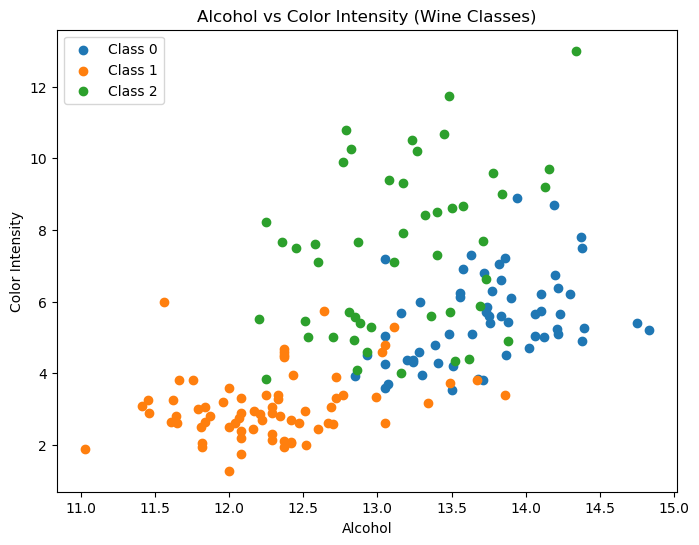

In [14]:
plt.figure(figsize=(8,6))

for class_label in df['target'].unique():
    subset = df[df['target'] == class_label]
    plt.scatter(subset['alcohol'], subset['color_intensity'], label=f'Class {class_label}')

plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Alcohol vs Color Intensity (Wine Classes)')
plt.legend()
plt.show()


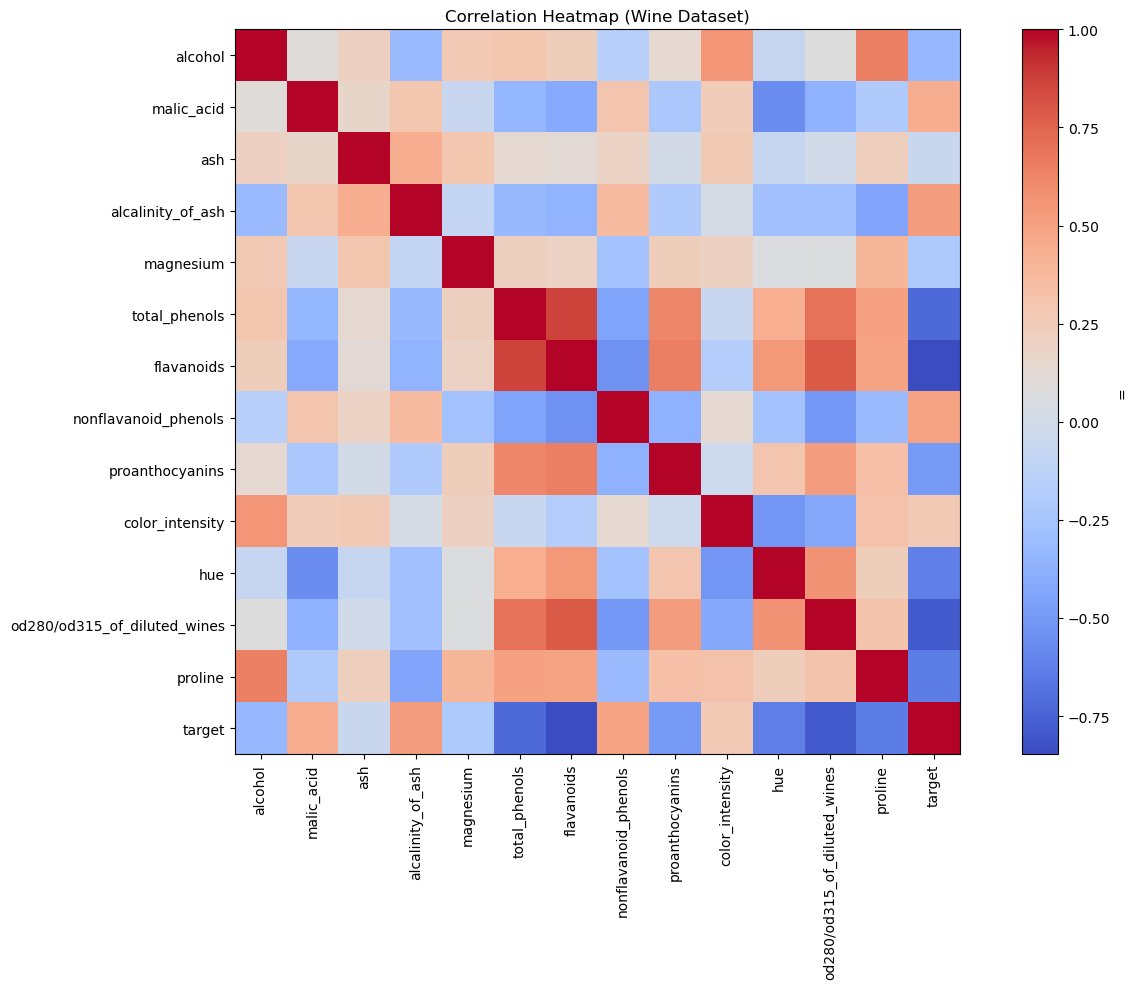

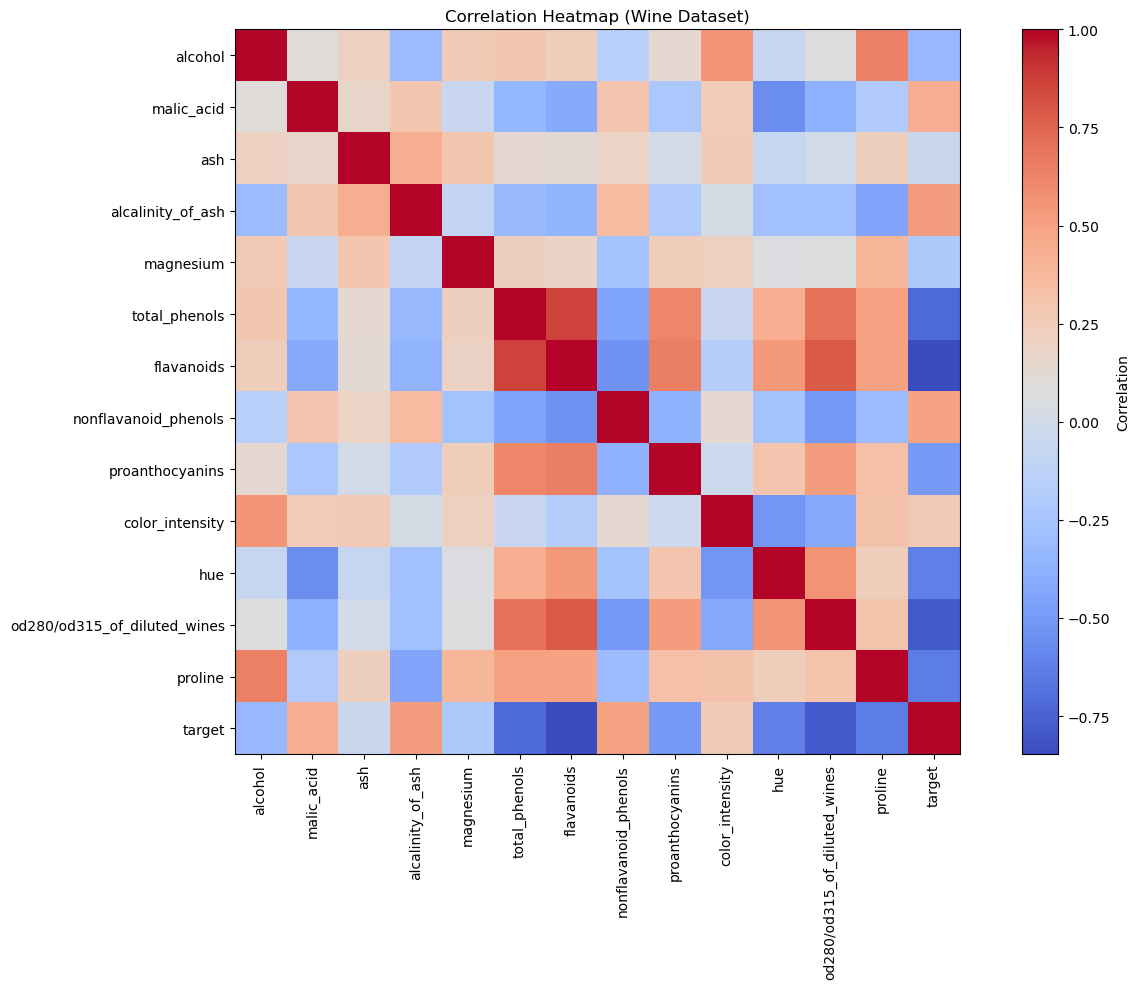

In [15]:
# Plot heatmap
plt.figure(figsize=(14, 10))

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='=')

# Add feature labels
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

plt.title('Correlation Heatmap (Wine Dataset)')
plt.tight_layout()
plt.show()# Plot heatmap
plt.figure(figsize=(14, 10))

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')

# Add feature labels
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

plt.title('Correlation Heatmap (Wine Dataset)')
plt.tight_layout()
plt.show()